# Visualiserer data
Bruker seaborn til å lage grafer med verdiene våre. Vi har tidligere funnet gjennomsnittsverdi per måned. For å få en best mulig visualisering av hvordan trendene har endret seg over årene, har vi valgt å bare se på en måned hvert år hvor brukeren selv kan velge hvilken måned de vil se på ved å skrive inn månedens nummer. 

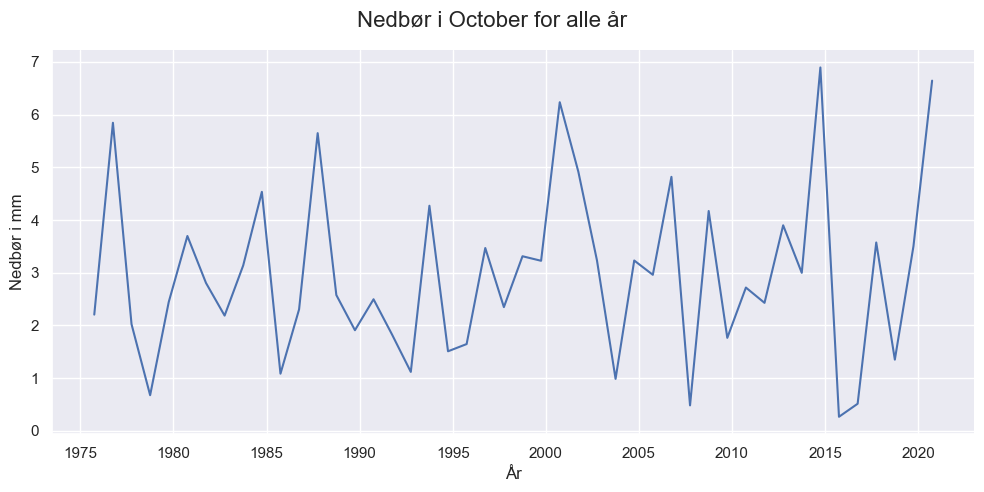

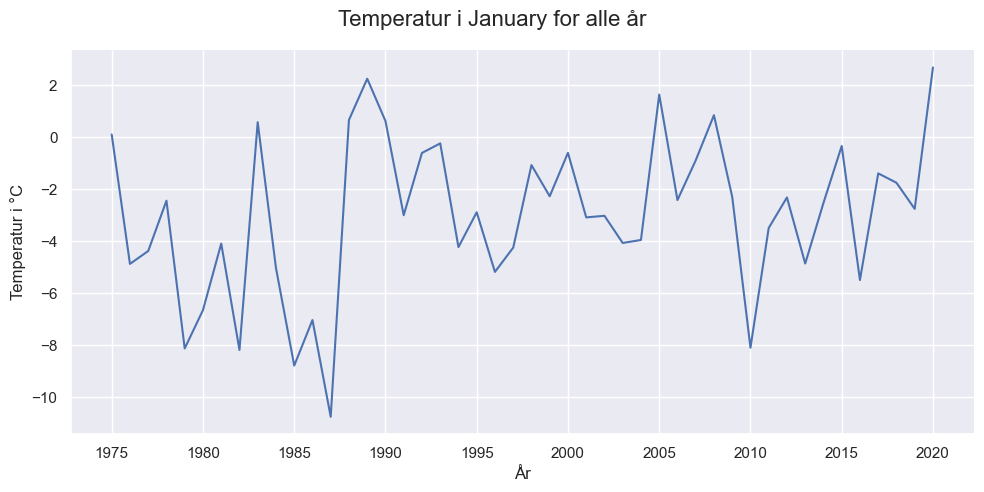

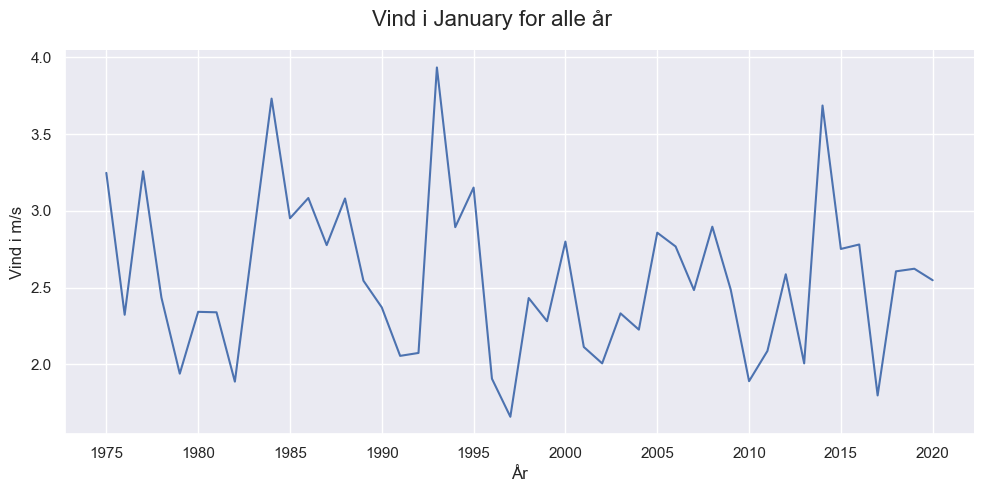

In [1]:
import sys
sys.path.append("../src")

from visualisering_seaborn import VisualiseringSeaborn

# Nedbør hver måned
nedbor_vis = VisualiseringSeaborn(
    "../data/Avarage/average_Precipitaion.csv",
    "Nedbør i mm",
    "Nedbør"
)
nedbor_vis.last_data()
nedbor_vis.filtrer_maaned(10)  # Velger hvilken måned man vil ha data for
nedbor_vis.plott()

# Temperatur hver måned
temp_vis = VisualiseringSeaborn(
    "../data/Avarage/average_Temperatur.csv",
    "Temperatur i °C",
    "Temperatur"
)
temp_vis.last_data()
temp_vis.filtrer_maaned(1)  
temp_vis.plott()

#Vind hver måned
vind_vis = VisualiseringSeaborn(
    "../data/Avarage/average_Wind.csv", 
    "Vind i m/s", 
    "Vind"
)
vind_vis.last_data()
vind_vis.filtrer_maaned(1)
vind_vis.plott()

# Interaktiv visualisering 
Her er det laget en intervaktiv visualisering slik at brukeren selv kan velge tidsintervallet de ønsker å sjekke værdata ved å dra på slideren over grafen.

In [3]:
import pandas as pd

import sys
sys.path.append("../src")

from interaktiv_visualisering import InteraktivVisualisering

# Leser data
df_nedbor = pd.read_csv("../data/Avarage/average_Precipitaion.csv")
print(df_nedbor.head())

df_temp = pd.read_csv("../data/Avarage/average_Temperatur.csv")
print(df_temp.head())

df_vind = pd.read_csv("../data/Avarage/average_Wind.csv")
print(df_vind.head())


# Visualiserer nedbør
interaktiv_visualisering_nedbor = InteraktivVisualisering(df_nedbor, "nedbor", "value")
interaktiv_visualisering_nedbor._vis_interaktiv_graf()

# Visualiserer temperatur
interaktiv_visualisering_temp = InteraktivVisualisering(df_temp, "temp", "value")
interaktiv_visualisering_temp._vis_interaktiv_graf()

# Visualiserer vind
interaktiv_visualisering_vind = InteraktivVisualisering(df_vind, "wind", "value")
interaktiv_visualisering_vind._vis_interaktiv_graf()


ModuleNotFoundError: No module named 'ipywidgets'

# Scatterplot av værdata
Her er det laget et scatterplot av data, kun fra måneden juli, som kan brukes til f.eks. regresjon. 

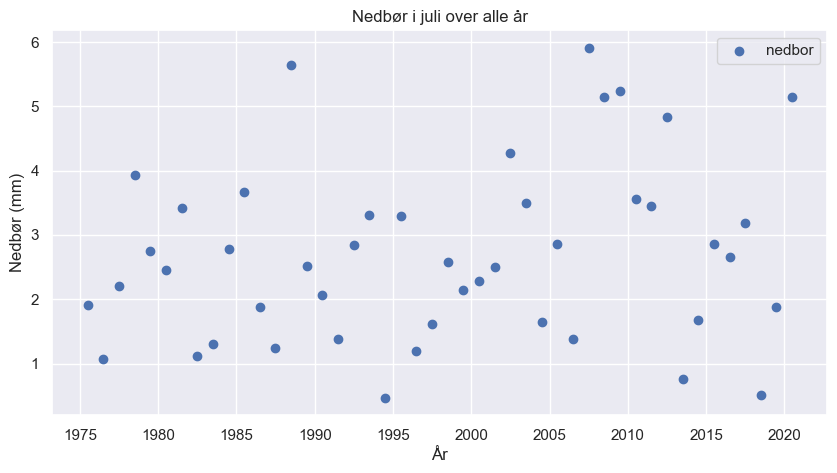

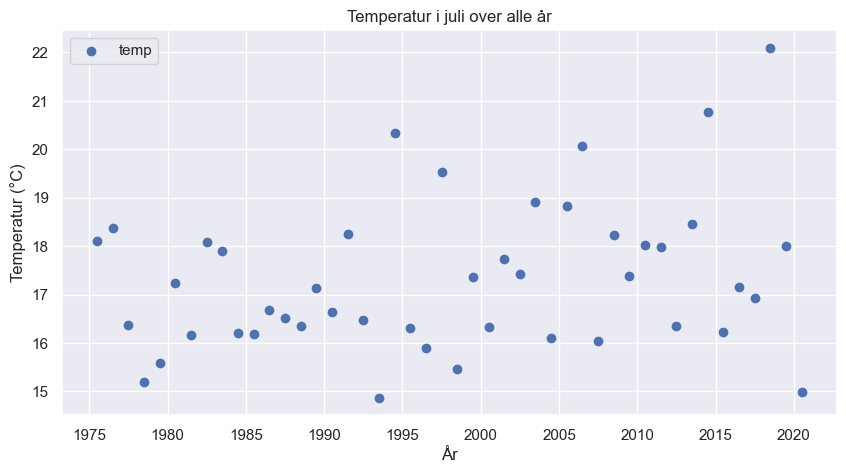

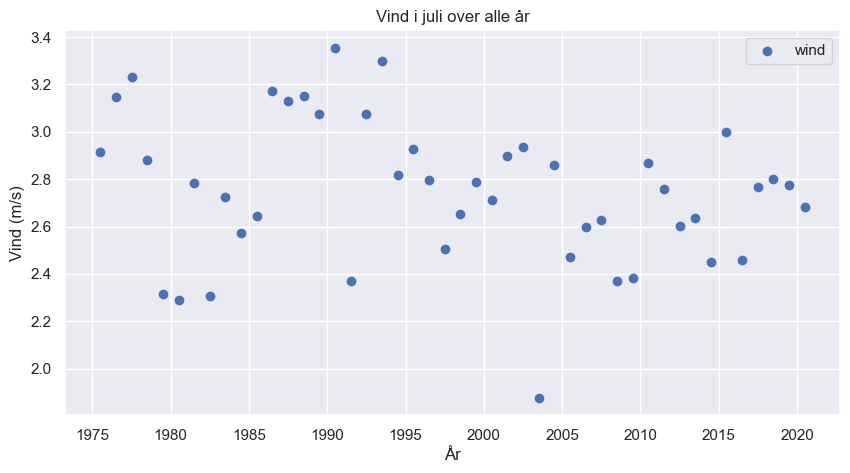

In [ ]:
import sys
sys.path.append("../src")

from scatterplot_visualisering import ScatterPlot

# Visualiserer nedbør
nedbor_visualisering = ScatterPlot("../data/Avarage/average_Precipitaion.csv", datatype="nedbor", kolonne="value")
nedbor_visualisering.plot_data()

# Visualiserer temperatur
temp_visualisering = ScatterPlot("../data/Avarage/average_Temperatur.csv", datatype="temp", kolonne="value")
temp_visualisering.plot_data()

# Visualiserer vind
vind_visualisering = ScatterPlot("../data/Avarage/average_Wind.csv", datatype="wind", kolonne="value")
vind_visualisering.plot_data()

# Sammenlikning av luftkvalitet med annen værdata i 2017
Vi har fått hentet inn en csv med data for luftkvaliteten ved samme værstasjon i 2017. Luftkvalitet har mye sammenheng med annen værdata, og vi skal se på hvordan sammenhengen er mellom luftkvaliteten og temperatur, nedbør og vind ved hjelp av matplotlib. 

### Sammenheng mellom luftkvalitet og nedbør

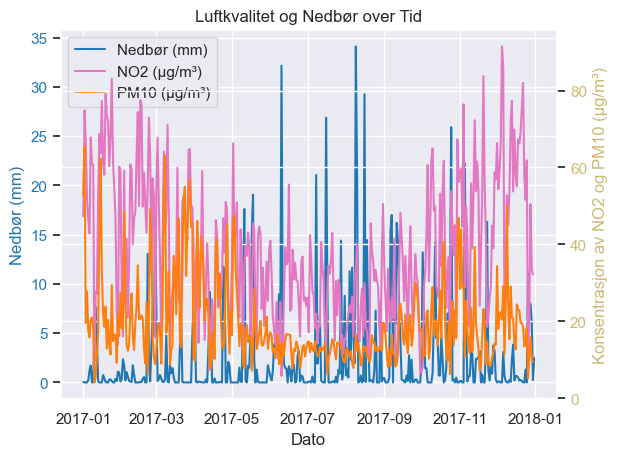

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leser inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_nedbor_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("precipitation_amount"))
]

fig, ax1 = plt.subplots()

# Primær y-akse - nedbør
ax1.plot(df_nedbor_2017["date"], df_nedbor_2017["value"], color="tab:blue", label="Nedbør (mm)")
ax1.set_ylabel("Nedbør (mm)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse - luftkvalitet
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["NO2"], color="tab:pink", label="NO2 (µg/m³)")
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["PM10"], color="tab:orange", label="PM10 (µg/m³)")
ax2.set_ylabel("Konsentrasjon av NO2 og PM10 (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

plt.title("Luftkvalitet og Nedbør over Tid")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()

### Analyse av resultat
Ved å se på visualisering av luftkvalitet og nedbør observerer vi at det en negativ korrelasjon. Vi observerer altså at i månedene med mye nedbør, som for eksempel juni og juli, vil konsentrasjonen av NO2 og PM10 være lav. I månedene med lite nedbør, for eksempel januar ser, ser vi det motsatte, altså at konsentrasjonen av NO2 vil være høy. Vi kan da konkludere med at nedbørsmengde vil være med å påvirke luftkvaliteten til å bli bedre. Dette er forventet da nedbør "skyller vekk" partiklene i luften. 

### Sammenheng mellom luftkvalitet og temperatur

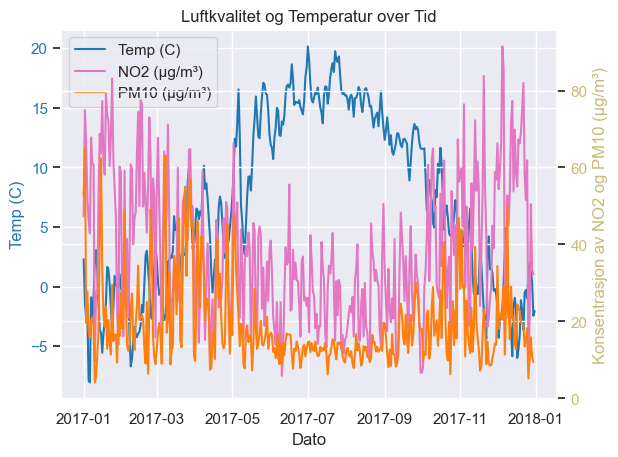

In [ ]:
# Leser inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_temp_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("air_temperature"))
]

fig, ax1 = plt.subplots()

# Primær y-akse - temperatur
ax1.plot(df_temp_2017["date"], df_temp_2017["value"], color="tab:blue", label="Temp (C)")
ax1.set_ylabel("Temp (C)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse - luftkvalitet
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["NO2"], color="tab:pink", label="NO2 (µg/m³)")
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["PM10"], color="tab:orange", label="PM10 (µg/m³)")
ax2.set_ylabel("Konsentrasjon av NO2 og PM10 (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

plt.title("Luftkvalitet og Temperatur over Tid")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()

### Analyse av resultat
Også her kan man se på visualiseringen at det er en negativ korrelasjon. I sommermånedene er det betydelig høyrere temperatur enn vintermånedene, og vi vil også se at konsentrasjonen av NO2 og PM10 går ned i sommermånedene og øker igjen når det går mot vinter. Det gir oss da resultatet at høy temperatur gir bedre luftkvalitet. 

### Sammenheng mellom luftkvalitet og vind

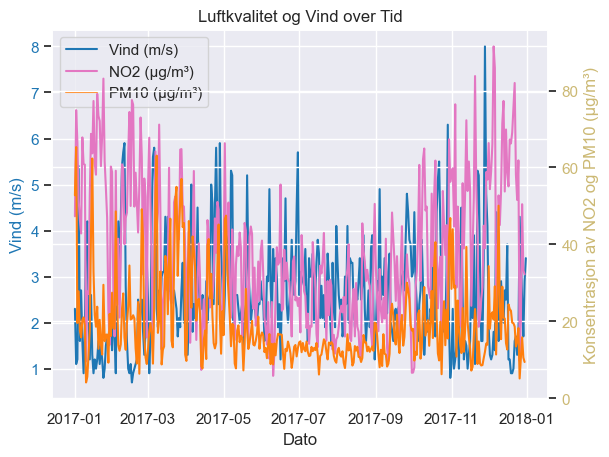

In [ ]:
# Leser inn CSV-filen
df_luftkvalitet = pd.read_csv("../data/daglig_gjennomsnitt_2017.csv")
df_luftkvalitet["date"] = pd.to_datetime(df_luftkvalitet["Date"])

df = pd.read_csv("../data/gjsnitt_data.csv")
df["date"] = pd.to_datetime(df["date"])
df_vind_2017 = df[
    (df['date'].dt.year == 2017) &
    (df['elementId'].str.contains("wind_speed"))
]

fig, ax1 = plt.subplots()

# Primær y-akse - vind
ax1.plot(df_vind_2017["date"], df_vind_2017["value"], color="tab:blue", label="Vind (m/s)")
ax1.set_ylabel("Vind (m/s)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Sekundær y-akse - luftkvalitet
ax2 = ax1.twinx()
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["NO2"], color="tab:pink", label="NO2 (µg/m³)")
ax2.plot(df_luftkvalitet["date"], df_luftkvalitet["PM10"], color="tab:orange", label="PM10 (µg/m³)")
ax2.set_ylabel("Konsentrasjon av NO2 og PM10 (µg/m³)", color="y")
ax2.tick_params(axis='y', labelcolor="y")

# Felles x-akse
ax1.set_xlabel("Dato")

plt.title("Luftkvalitet og Vind over Tid")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()

### Analyse av resultat
Vinden har ikke et like tydelig mønster gjennom året som det temperatur og nedbør har hatt. Det er derfor rimelig å anta at det er nedbør og temperatur som har hatt størst påvirkning på luftkvaliteten dette året. Likevel er det forventet at med mye vind, så blir den forurensede luften transportert bort og luften oppleves renere. Derfor gir det mening at vinden i løpet av sommeren, sammen med temperaturen og nedbøren, gjorde at konsentrasjonen av NO2 og PM10 ble lavere. 